<a href="https://colab.research.google.com/github/JaeHeee/emotion-recognition/blob/master/model/Emotion_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import keras

In [0]:
import os

base_dir = './drive/My Drive/Colab Notebooks/data'

train_dir = os.path.join(base_dir, 'FER2013Train')
validation_dir = os.path.join(base_dir, 'FER2013Valid')
test_dir = os.path.join(base_dir, 'FER2013Test')

In [0]:
callbacks_list = [
            keras.callbacks.EarlyStopping(
                monitor='val_accuracy',
                patience=3,
            ),
            keras.callbacks.ModelCheckpoint(
                filepath='./drive/My Drive/Colab Notebooks/data/my_model.h5',
                monitor = 'val_loss',
                save_best_only=True,
            )   
]

In [0]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
rotation_range=25, width_shift_range=0.1,
    height_shift_range=0.1, shear_range=0.2, 
    zoom_range=0.2,horizontal_flip=True, 
    fill_mode="nearest")

test_datagen = ImageDataGenerator(rescale=1./255)

In [0]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(48, 48),
        batch_size=64,########
        color_mode='grayscale',
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(48, 48),
        batch_size=64,#####
        color_mode='grayscale',
        class_mode='categorical')

Found 27378 images belonging to 5 classes.
Found 3421 images belonging to 5 classes.


In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.regularizers import l2

In [0]:
num_features = 64
num_labels = 5
batch_size = 64
epochs = 100
width, height = 48, 48

model = Sequential()

model.add(Conv2D(num_features, kernel_size=(3, 3), activation='relu', input_shape=(width, height, 1), data_format='channels_last', kernel_regularizer=l2(0.01)))
model.add(Conv2D(num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(2*2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(2*2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(2*2*2*num_features, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(2*2*num_features, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(2*num_features, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(num_labels, activation='softmax'))



In [0]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 46, 46, 64)        640       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 46, 46, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 23, 23, 128)       73856     
_________________________________________________________________
batch_normalization_2 (Batch (None, 23, 23, 128)     

In [0]:
model.compile(loss=categorical_crossentropy,
              optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7),
              metrics=['accuracy'])


In [0]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=27378//batch_size,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=3421//batch_size,
      callbacks=callbacks_list
      )

Epoch 1/100
427/427 [==============================] - 104s 243ms/step - loss: 1.6339 - accuracy: 0.3368 - val_loss: 1.5202 - val_accuracy: 0.3894


/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


Epoch 2/100
427/427 [==============================] - 105s 245ms/step - loss: 1.4857 - accuracy: 0.3714 - val_loss: 1.4946 - val_accuracy: 0.3923
Epoch 3/100
427/427 [==============================] - 105s 246ms/step - loss: 1.4538 - accuracy: 0.3797 - val_loss: 1.3690 - val_accuracy: 0.4296
Epoch 4/100
427/427 [==============================] - 104s 243ms/step - loss: 1.4160 - accuracy: 0.4047 - val_loss: 1.4129 - val_accuracy: 0.4248
Epoch 5/100
427/427 [==============================] - 104s 243ms/step - loss: 1.3762 - accuracy: 0.4289 - val_loss: 1.4972 - val_accuracy: 0.3738
Epoch 6/100
427/427 [==============================] - 105s 245ms/step - loss: 1.2976 - accuracy: 0.5047 - val_loss: 1.1628 - val_accuracy: 0.6253
Epoch 7/100
427/427 [==============================] - 103s 242ms/step - loss: 1.1876 - accuracy: 0.5748 - val_loss: 1.1433 - val_accuracy: 0.6399
Epoch 8/100
427/427 [==============================] - 104s 244ms/step - loss: 1.1126 - accuracy: 0.6129 - val_loss: 1

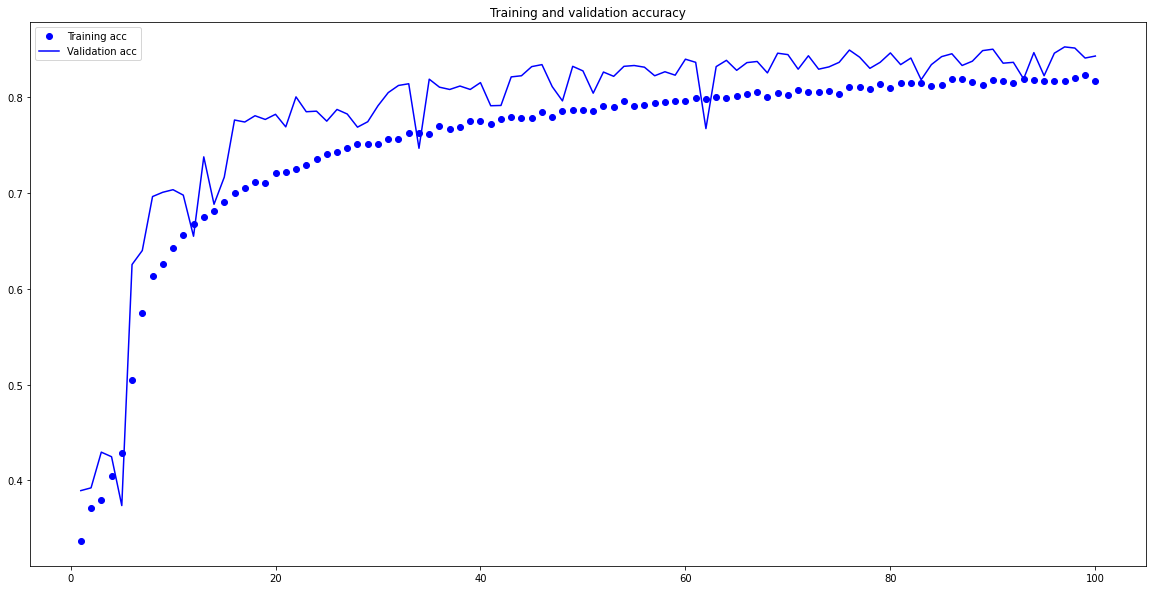

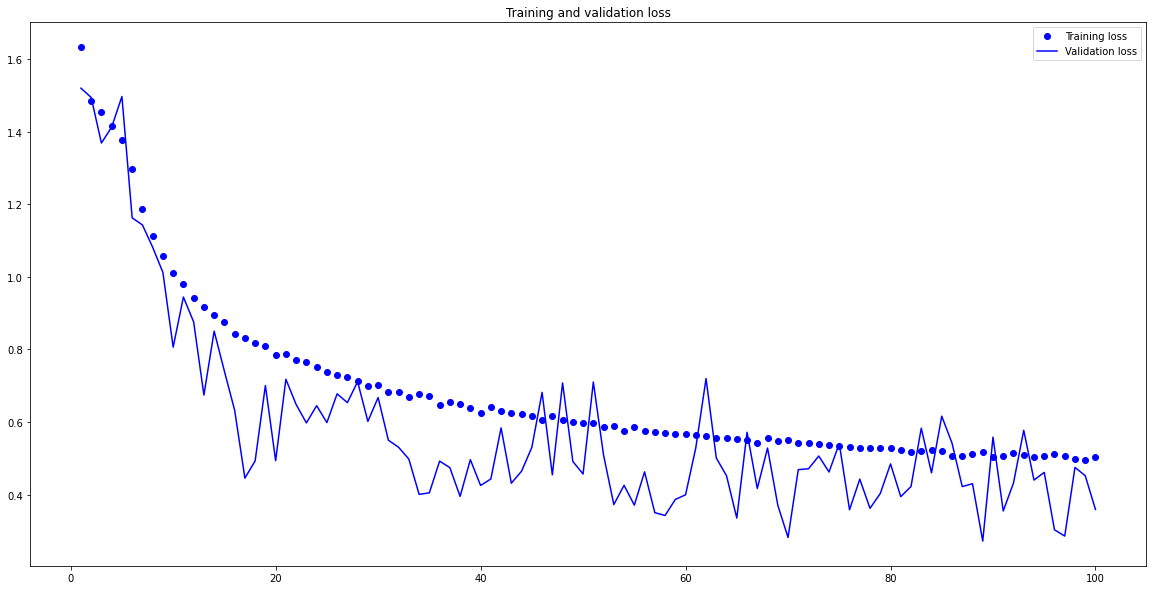

In [0]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

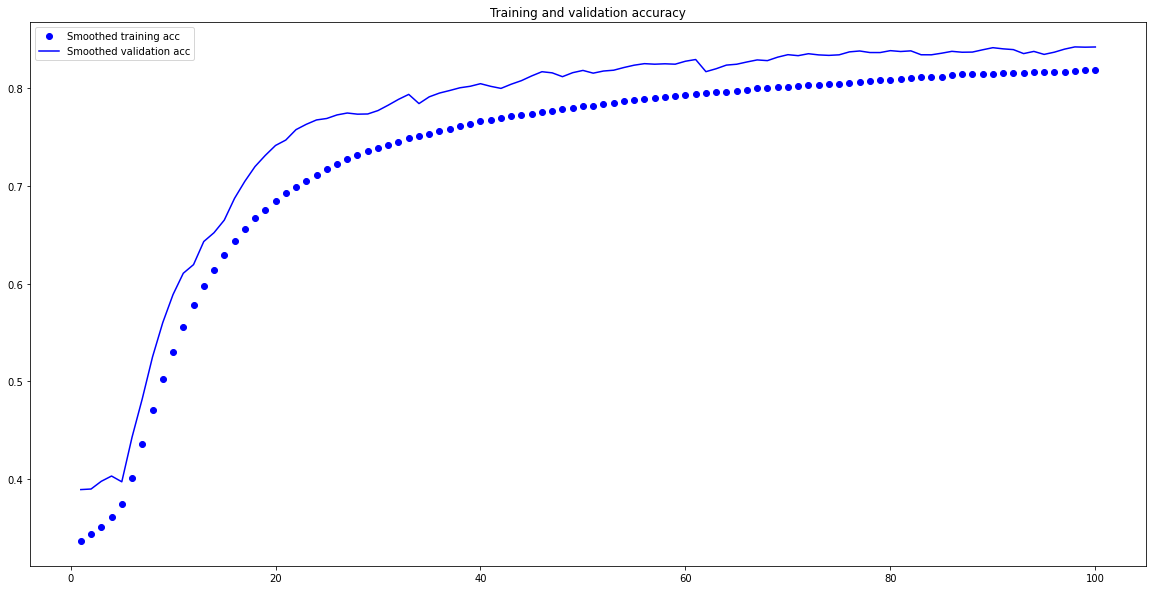

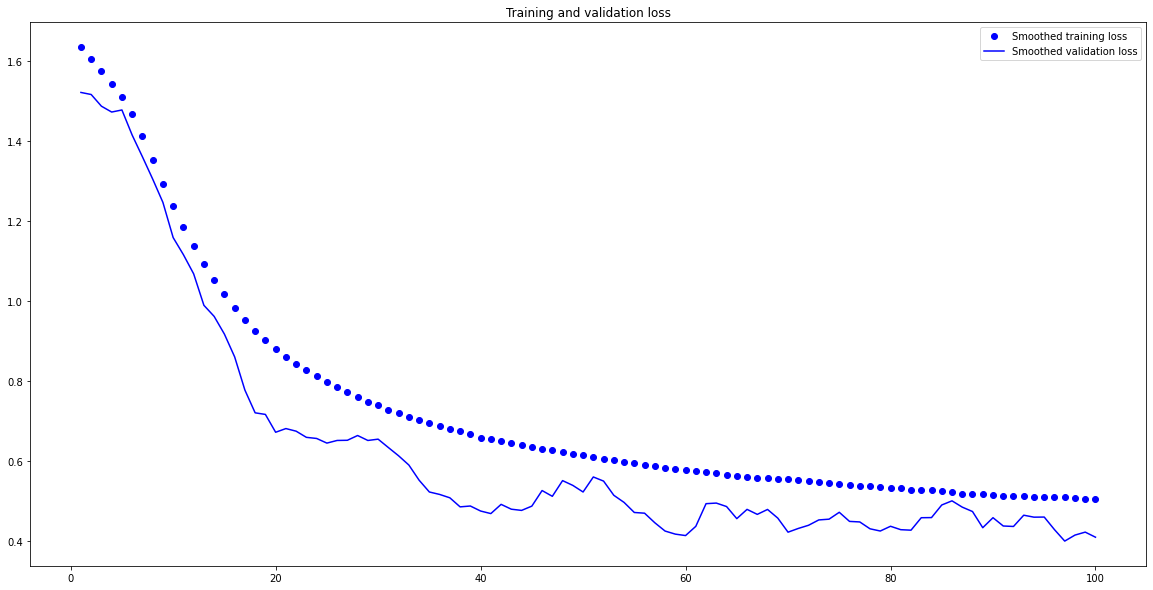

In [0]:
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

plt.plot(epochs,
         smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,
         smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(48, 48),
        batch_size=64,
        color_mode='grayscale',
        class_mode='categorical')



Found 3403 images belonging to 5 classes.


In [0]:
test_loss, test_acc = model.evaluate_generator(test_generator, steps=10)
print('test acc:', test_acc)

test acc: 0.848437488079071


In [0]:
output = model.predict_generator(test_generator, steps=5)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
print(test_generator.class_indices)
print(output)

{'Angry': 0, 'Happy': 1, 'Neutral': 2, 'Sad': 3, 'Surprise': 4}
[[0.000 1.000 0.000 0.000 0.000]
 [0.016 0.001 0.625 0.357 0.001]
 [0.000 0.003 0.996 0.001 0.000]
 ...
 [0.009 0.903 0.077 0.011 0.000]
 [0.028 0.001 0.895 0.075 0.001]
 [0.985 0.000 0.000 0.000 0.015]]


In [0]:
model.save_weights('./drive/My Drive/Colab Notebooks/data/emotion_recognition.h5')
model.save('./drive/My Drive/Colab Notebooks/data/emotion_keras.h5')